In [1]:
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
import os

# Chlorophyll Data

In [2]:
path = 'C:/Users/Admin/Downloads/NOAA/2022'
files = [f for f in os.listdir(path) if f.endswith('.nc')]

ds = xr.open_mfdataset(os.path.join(path, f) for f in files)

Selected File:  2022-01-01.nc 


<xarray.Dataset>
Dimensions:    (time: 1, altitude: 1, latitude: 511, longitude: 457)
Coordinates:
  * time       (time) datetime64[ns] 2022-01-01T12:00:00
  * altitude   (altitude) float64 0.0
  * latitude   (latitude) float32 50.04 49.96 49.88 49.79 ... 7.708 7.625 7.542
  * longitude  (longitude) float32 -98.04 -97.96 -97.88 ... -60.21 -60.12 -60.04
Data variables:
    chlor_a    (time, altitude, latitude, longitude) float32 ...
Attributes: (12/62)
    _lastModified:                             2023-02-12T20:30:07.000Z
    cdm_data_type:                             Grid
    Conventions:                               CF-1.6 ACDD-1.3, COARDS
    creator_email:                             coastwatch.info@noaa.gov
    creator_name:                              NOAA CoastWatch
    creator_type:                              institution
    ...                                        ...
    temporal_range:                            daily
    testOutOfDate:

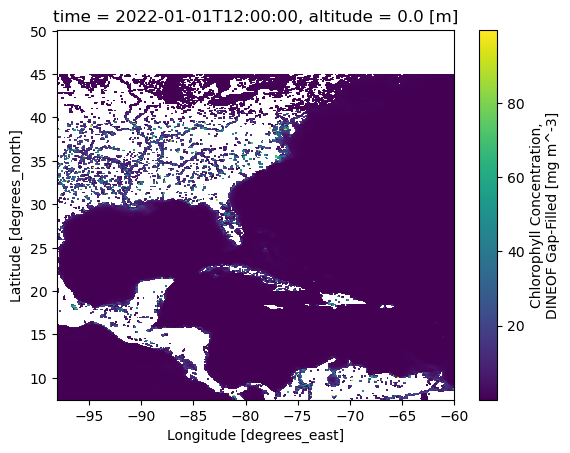

In [3]:
import tkinter as tk

root = tk.Tk()
root.title("Select a file")
root.geometry("500x300")

var = tk.StringVar(root)
var.set(files[0]) # default value

frame = tk.Frame(root, width=500, height = 100)
frame.pack()


dropdown = tk.OptionMenu(root, var, *files)
dropdown.pack()

def read_nc_file():
    selected_file = var.get()
    ds = xr.open_dataset(os.path.join(path, selected_file))
    print("Selected File: ",selected_file,"\n\n")
    print(ds)
    
def plot_nc_file():
    selected_file = var.get()
    ds = xr.open_dataset(os.path.join(path, selected_file))
    print("\n\nPlot Diagram of Selected File: ",selected_file,"\n\n")
    ds.chlor_a.plot()
    root.destroy()

read_button = tk.Button(root, text="Read", command=read_nc_file)
read_button.pack()

visualize_button = tk.Button(root, text="Plot", command=plot_nc_file)
visualize_button.pack()

root.mainloop()